# Tipping based on Food and Service Quality

Consider three simple rules:

1. If the food is bad OR the service is poor, then the tip will be low
2. If the service is acceptable, then the tip will be medium
3. If the food is great OR the service is amazing, then the tip will be high.
4. If the food is great AND the service is poor, then the tip will be low.

Most people would agree on these rules, but the rules are fuzzy. Mapping the imprecise rules into a defined, actionable tip is a challenge. This is the kind of task at which fuzzy logic excels.

# Required Libraries

https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem.html

https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html

# Input variables
Two inputs
- food quality
- service


# Output variable

the output variable is the tip amount.


# Import Packages

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=fac91f99ce71fdec5e034b001b37c3a323e341905a68c55ba941f8b65f90767b
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate UoD of fuzzy-variables
Remember, all possible values that a variable can take are referred to as Universe of Discourse, in the context of linguistic variables.

In [ ]:
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)


# Generate fuzzy membership functions



Triangular membership function (trinmf) is used for fuzzification of the variables
- food quality
  - low
  - medium
  - high
- service
  - low
  - medium
  - high
- tip amount
  - low
  - medium
  - high

- Triangular membership function Formula
  <img src="https://github.com/DrUzair/KES/blob/master/fuzzy_logic/images/trimf.png?raw=true" width="300">

  - [abc]
  - $a \le b \le c$
  - zero for $x \le a$ and $x \ge  c$
  - increases a to b
  - decreases b to c

In [ ]:
# Generate fuzzy membership functions
# food quality
qual_lo = fuzz.trimf(x_qual, abc=[0, 0, 5])
qual_md = fuzz.trimf(x_qual, abc=[0, 5, 10])
qual_hi = fuzz.trimf(x_qual, abc=[5, 10, 10])
# service quality
serv_lo = fuzz.trimf(x_serv, abc=[0, 0, 5])
serv_md = fuzz.trimf(x_serv, abc=[0, 5, 10])
serv_hi = fuzz.trimf(x_serv, abc=[5, 10, 10])
# tip
tip_lo = fuzz.trimf(x_tip, abc=[0, 0, 13])
tip_md = fuzz.trimf(x_tip, abc=[0, 13, 25])
tip_hi = fuzz.trimf(x_tip, abc=[13, 25, 25])

Have a look on the food quality membership functions for low, medium and high

In [ ]:
print('x_qual',x_qual)
print('qual_lo', qual_lo)
print('qual_md',qual_md)
print('qual_hi',qual_hi)

x_qual [ 0  1  2  3  4  5  6  7  8  9 10]
qual_lo [1.  0.8 0.6 0.4 0.2 0.  0.  0.  0.  0.  0. ]
qual_md [0.  0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2 0. ]
qual_hi [0.  0.  0.  0.  0.  0.  0.2 0.4 0.6 0.8 1. ]


The triangular membership function



# Visualize these universes and membership functions

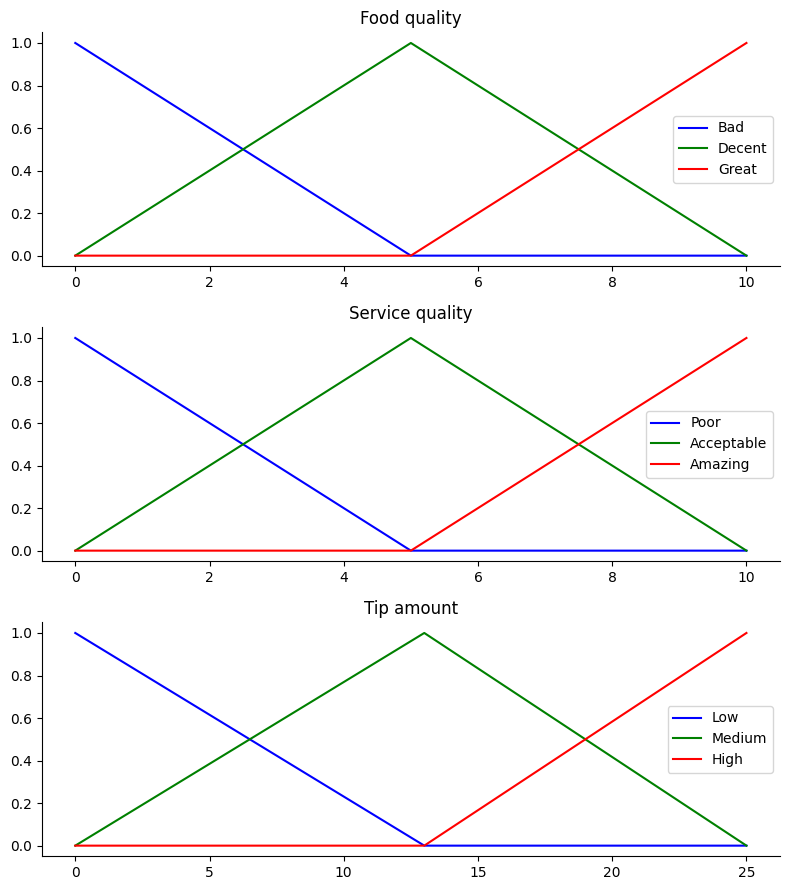

In [ ]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Fuzzy Rule based Tipping

Now, to make these triangles useful, we define the fuzzy relationship between input and output variables. For the purposes of our example, consider three simple rules:

1. If the food is bad OR the service is poor, then the tip will be low
2. If the service is acceptable, then the tip will be medium
3. If the food is great OR the service is amazing, then the tip will be high.

Most people would agree on these rules, but the rules are fuzzy. Mapping the imprecise rules into a defined, actionable tip is a challenge. This is the kind of task at which fuzzy logic excels.





## Question 1
What would the tip be in the following circumstance:

- Food quality was 6.5
- Service was 9.8



### Fuzzification: interp_membership function
Find the degree of membership u(xx) for a given value of x = xx.
We need the activation of our fuzzy membership functions at these values.
The exact values 6.5 and 9.8 do not exist on our universes...
This is what fuzz.interp_membership exists for!

In [ ]:
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)
print(qual_level_lo, qual_level_md, qual_level_hi)

0.0 0.7 0.30000000000000004


In [ ]:
serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.8)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.8)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.8)
print(serv_level_lo, serv_level_md, serv_level_hi)

0.0 0.03999999999999987 0.9600000000000002


### Rule Evaluation (Inference)
1. If the food is bad OR the service is poor, then the tip will be low

In [ ]:
import math

antecedent = np.fmax(qual_level_lo, serv_level_lo) # fuzzy-max = Boolean OR
print('antecedent', antecedent)
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
print('tip_lo')
print('consequent', tip_lo.round(2))
tip_activation_lo = np.fmin(antecedent, tip_lo)  # fuzzy-min = Boolean AND
print('Rule 1: tip_activation_lo')
print(tip_activation_lo)

antecedent 0.0
tip_lo
consequent [1.   0.92 0.85 0.77 0.69 0.62 0.54 0.46 0.38 0.31 0.23 0.15 0.08 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
Rule 1: tip_activation_lo
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


2. If the service is acceptable, then the tip will be medium

In [ ]:
# For rule 2 we connect acceptable service to medium tipping
tip_activation_md = np.fmin(serv_level_md, tip_md) # fuzzy-min = Boolean AND

print('antecedent (serv_level_md)')
print(serv_level_md.round(4))
print('consequent (tip_md)')
print(tip_md.round(1))
print('Rule 2: tip_activation_md')
print(tip_activation_md)

antecedent (serv_level_md)
0.04
consequent (tip_md)
[0.  0.1 0.2 0.2 0.3 0.4 0.5 0.5 0.6 0.7 0.8 0.8 0.9 1.  0.9 0.8 0.8 0.7
 0.6 0.5 0.4 0.3 0.2 0.2 0.1 0. ]
Rule 2: tip_activation_md
[0.   0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.  ]


3. If the food is great OR the service is amazing, then the tip will be high.

In [ ]:
# For rule 3 we connect high service OR high food with high tipping
antecedent_rule3 = np.fmax(qual_level_hi, serv_level_hi) # fuzzy-max = Boolean OR
print('antecedent_rule3', antecedent_rule3)
print('Consequent Rule 3: (tip_hi)')
print(tip_hi)
tip_activation_hi = np.fmin(antecedent_rule3, tip_hi)
print('Rule 3 activation : tip_activation_hi')
print(tip_activation_hi)

antecedent_rule3 0.9600000000000002
Consequent Rule 3: (tip_hi)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.08333333 0.16666667 0.25       0.33333333
 0.41666667 0.5        0.58333333 0.66666667 0.75       0.83333333
 0.91666667 1.        ]
Rule 3 activation : tip_activation_hi
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.08333333 0.16666667 0.25       0.33333333
 0.41666667 0.5        0.58333333 0.66666667 0.75       0.83333333
 0.91666667 0.96      ]


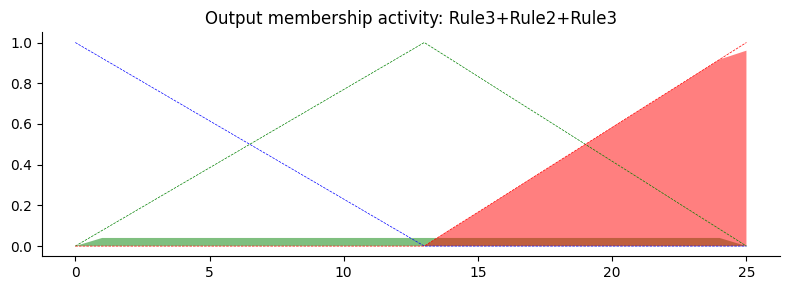

In [ ]:
tip0 = np.zeros_like(x_tip)
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.fill_between(x=x_tip, y1=tip0, y2=tip_activation_lo, facecolor='b', alpha=0.5)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.5)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.5)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity: Rule3+Rule2+Rule3')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

### Aggregation (Composition)

- Aggregate all three output membership functions together


In [ ]:
aggregated = np.fmax(tip_activation_lo, np.fmax(tip_activation_md, tip_activation_hi))
print(aggregated)

[0.         0.04       0.04       0.04       0.04       0.04
 0.04       0.04       0.04       0.04       0.04       0.04
 0.04       0.04       0.08333333 0.16666667 0.25       0.33333333
 0.41666667 0.5        0.58333333 0.66666667 0.75       0.83333333
 0.91666667 0.96      ]


### Defuzzification
Calculate defuzzified result using the centroid method

In [ ]:
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
print(tip)
# tip = fuzz.defuzz(x_tip, aggregated, 'som')
# print(tip)
# tip = fuzz.defuzz(x_tip, aggregated, 'mom')
# print(tip)
# tip = fuzz.defuzz(x_tip, aggregated, 'lom')
# print(tip)


19.86871794871795


## Plot the output

In [ ]:
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # for plot
tip_activation

0.5723931623931626

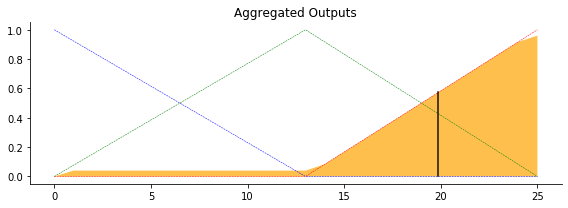

In [ ]:

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated Outputs')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Control API

## UofD

In [ ]:
from skfuzzy import control as ctrl
# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

## Membership Functions

In [ ]:
# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
quality.view()
service.automf(3)
service.view()
tip.automf(3)
tip.view()

## Rules

In [ ]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['poor'])
rule2 = ctrl.Rule(service['average'], tip['average'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['good'])

## Control System

19.76409495548962


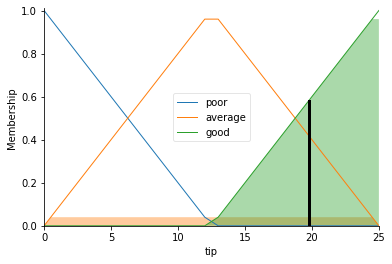

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()
print (tipping.output['tip'])
tip.view(sim=tipping)